In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pyroSAR
from s1pro.s1_coh_proc import S1_coh_proc
from s1pro.s1_simple_proc import S1_insar_proc
from spatialist import Vector
import geopandas as gpd
import logging
import matplotlib.pyplot as plt

# detailed debug info
# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

In [2]:
# aoi = Vector('/data/aoi_bretagne.geojson')
infiles = [
    "/data/S1/S1A_IW_SLC__1SDV_20230826T180527_20230826T180554_050050_0605B2_E768.zip",
    "/data/S1/S1A_IW_SLC__1SDV_20230814T180526_20230814T180553_049875_05FFB4_7D92.zip",
]
file_aoi = "/data/aoi_bretagne.geojson"
# gpt_paras = ["-e", "-x", "-c","35G", "-q", "4", "-J-Xms25G", "-J-Xmx75G"]
# gpt_paras = ["-e", "-x", "-c", "4G", "-q", "6", "-J-Xms4G", "-J-Xmx10G", "-Dsnap.gpf.disableTileCache=true"]
# gpt_paras = ["-x", "-c", "8G", "-q", "6", "-J-Xms1G", "-J-Xmx10G"]
# gpt_paras = ["-x", "-c", "8027m", "-q", "6", "-J-Xmx11468m",  "-J-Xms2048m", "-J-XX:+AggressiveOpts", "-J-Xverify:none"]
# gpt_paras = ["-x", "-c", "8027m", "-q", "8", "-J-Xmx20G",  "-J-Xms2048m", "-J-XX:+AggressiveOpts", "-J-Xverify:none"]
# S1_coh_proc(infiles, out_dir='/data/res', shapefile=aoi, pol='VV',tmpdir='/data/tmp', gpt_paras=gpt_paras)
# S1_coh_proc(infiles, out_dir='/data/res', shapefile=aoi, pol='VV',tmpdir='/data/tmp')
# S1_coh_proc(infiles, out_dir='/data/res', IWs=['IW3'], pol='VV',tmpdir='/data/tmp', gpt_paras=gpt_paras)
# S1_coh_proc(infiles, out_dir='/data/res',
#             tmpdir='/data/tmp',
#             pol='VV',
#             IWs='IW1',
#             gpt_paras=gpt_paras)
# info = pyroSAR.identify_many(infiles)
# for i in info:
# print(i)
df_aoi = gpd.read_file(file_aoi)

In [16]:
S1_insar_proc(
    infiles[0],
    infiles[1],
    out_dir="/data/res",
    tmp_dir="/data/tmp",
    shp=df_aoi.geometry[0],
    pol="VV",
    coh_only=False,
    clear_tmp_files=False
)

INFO:s1pro.s1_simple_proc:Processing subswath IW2 in VV polarization.
INFO:s1pro.s1_simple_proc:TOPS coregistration
INFO:pyroSAR.snap.auxil:executing node sequences..
INFO:pyroSAR.snap.auxil:TOPSAR-Split
INFO:pyroSAR.snap.auxil:TOPSAR-Split
INFO:pyroSAR.snap.auxil:Apply-Orbit-File
INFO:pyroSAR.snap.auxil:Apply-Orbit-File
INFO:pyroSAR.snap.auxil:Calibration
INFO:pyroSAR.snap.auxil:Calibration
INFO:pyroSAR.snap.auxil:Back-Geocoding
INFO:pyroSAR.snap.auxil:TOPSAR-Deburst
INFO:s1pro.s1_simple_proc:Coherence estimation
INFO:pyroSAR.snap.auxil:executing node sequence..
INFO:pyroSAR.snap.auxil:Interferogram
INFO:s1pro.s1_simple_proc:Computing intensities
INFO:pyroSAR.snap.auxil:executing node sequence..
INFO:pyroSAR.snap.auxil:BandSelect -> BandMaths -> BandMaths(2) -> BandMerge
INFO:s1pro.s1_simple_proc:Terrain correction (geocoding)
INFO:pyroSAR.snap.auxil:executing node sequences..
INFO:pyroSAR.snap.auxil:Multilook
INFO:pyroSAR.snap.auxil:Terrain-Correction
INFO:s1pro.s1_simple_proc:Removi

In [ ]:
from pyroSAR.snap.auxil import execute, groupbyWorkers, gpt

# grp = groupbyWorkers('./TOPSAR Coreg Interferogram IW2 to GeoTiff.xml', n=1)
grp = groupbyWorkers("./experiment_from_snap_graph.xml", n=1)
# grp = groupbyWorkers('./Coh_tmp_prep_graph_dbg.xml', n=1)

gpt("./experiment_from_snap_graph.xml", groups=grp, tmpdir="/data/tmp/")
# gpt('./Coh_tmp_prep_graph_dbg.xml', groups=grp, tmpdir='/data/tmp/')
# execute('./Coh_tmp_prep_graph_dbg.xml', gpt_args=gpt_paras)
# execute('./experiment_from_snap_graph.xml', gpt_args=gpt_paras)

In [ ]:
import rasterio as rio

# with rio.open('/data/tmp/S1_A_relOrb_103_COH__VV_20230826T180527_20230814T180526/S1_A_relOrb_103_COH__VV_20230826T180527_20230814T180526.tif') as ds:
with rio.open("/data/S1/test_ifg.tif") as ds:
    # with rio.open('/data/tmp/S1_relOrb_TEST_split_before_orbit.tif') as ds:
    print(ds.profile)
    img = ds.read(3)
    re = ds.read(1)
    im = ds.read(2)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.imshow(img[::8, ::8], interpolation="nearest")  # , vmin=0, vmax=100000)
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.imshow(
    np.angle(re + 1j * im)[::8, ::8], interpolation="nearest", vmin=0, vmax=100000000
)
plt.colorbar()

In [ ]:
plt.hist(img.ravel()[::100])

In [13]:
import rasterio as rio

with rio.open("/data/tmp/IW2_VV_26Aug2023_14Aug2023_slice_9_ifg_tc_border.tif") as ds:
    print(ds.profile)
    # img = ds.read(3)
    re = ds.read(1)
    im = ds.read(2)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 7860, 'height': 3701, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0001796630568239043, 0.0, -4.167986258910416,
       0.0, -0.0001796630568239043, 48.4266843091998), 'blockxsize': 528, 'blockysize': 416, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


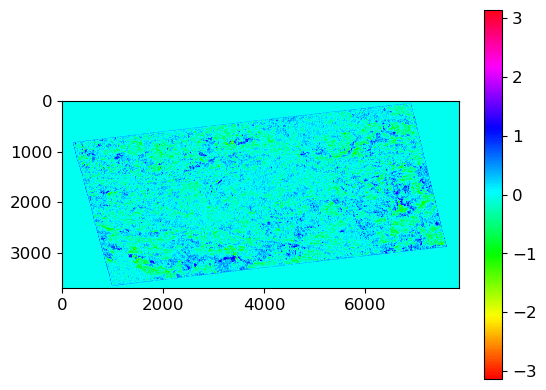

In [14]:
plt.imshow(np.angle(re+1j*im), cmap='hsv')
plt.colorbar()

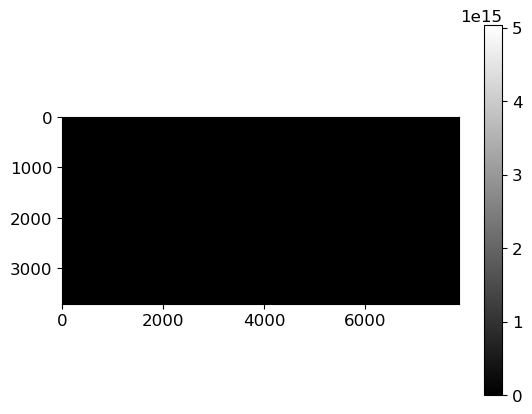

In [7]:

plt.imshow(np.abs(re**2, im**2), cmap='gray')
plt.colorbar()

In [ ]:
rio.shutil.copy